In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df= pd.read_csv("BankNote_Authentication.csv")

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


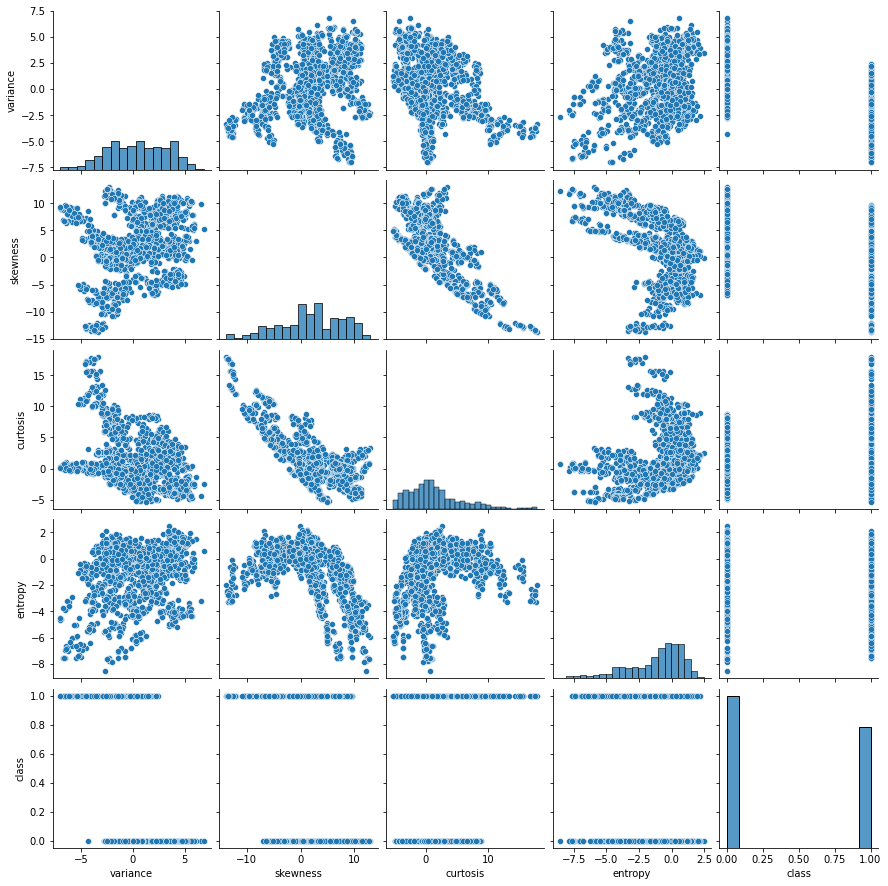

In [7]:
sns.pairplot(df)

In [8]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [9]:
df.corr().transpose()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


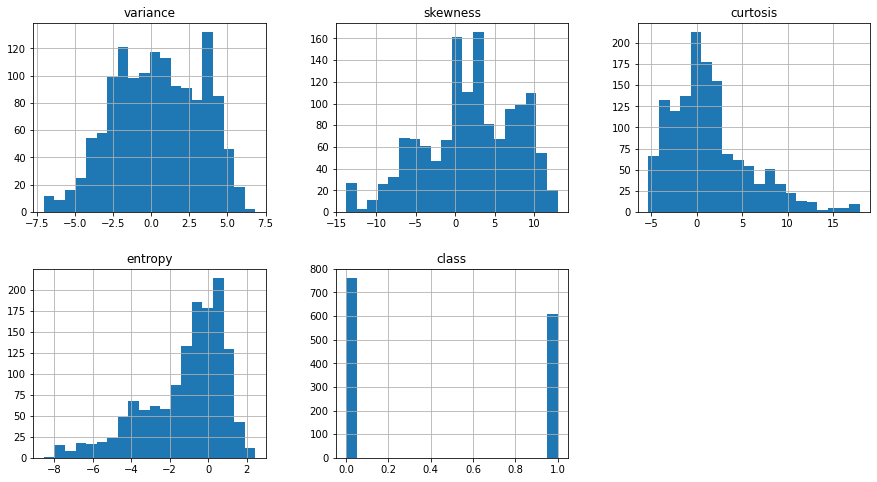

In [10]:
df.hist(bins=20, figsize=(15,8),layout=(2,3));

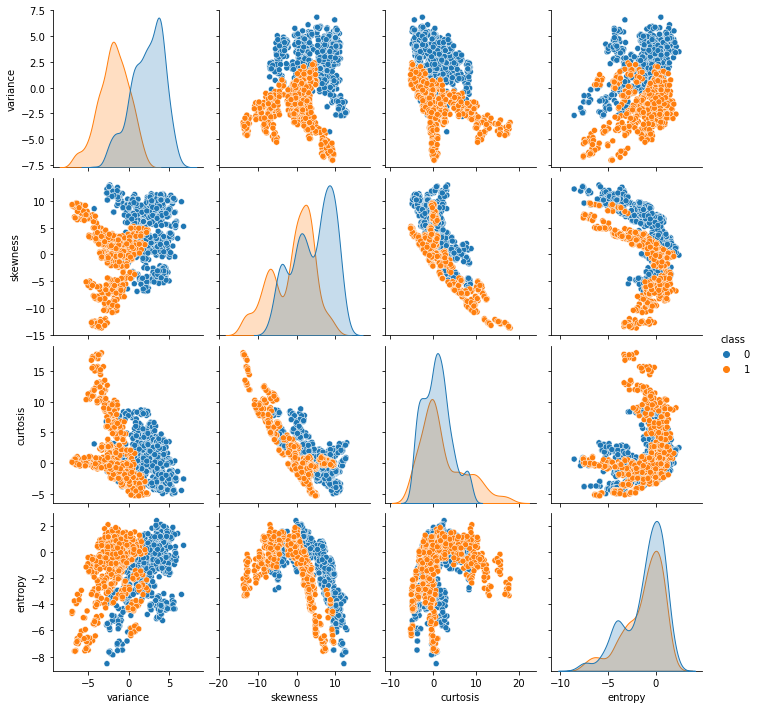

In [11]:
sns.pairplot(df, hue="class")

In [12]:
X=df.drop('class',axis=1)

In [13]:
y=df['class']

In [14]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=101)

In [19]:
sc= StandardScaler()

In [57]:
scaled_X= sc.transform(X)

In [20]:
scaled_X_train= sc.fit_transform(X_train)

In [21]:
scaled_X_test= sc.transform(X_test)

In [22]:
log= LogisticRegression()

In [23]:
log.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred= log.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.9927184466019418

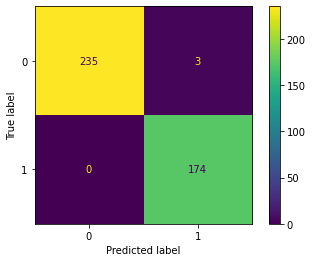

In [26]:
plot_confusion_matrix(log,X_test,y_test)

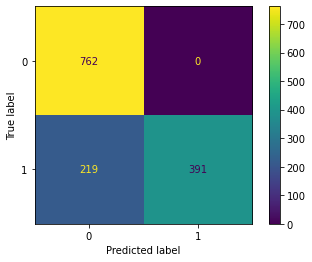

In [59]:
plot_confusion_matrix(log,X,y)

In [27]:
log.fit(scaled_X_train,y_train)

LogisticRegression()

In [28]:
y_pred_scaled= log.predict(scaled_X_test)

In [29]:
accuracy_score(y_test,y_pred_scaled)

0.9854368932038835

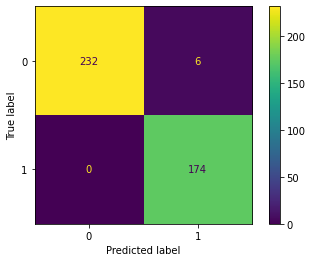

In [30]:
plot_confusion_matrix(log,scaled_X_test,y_test)

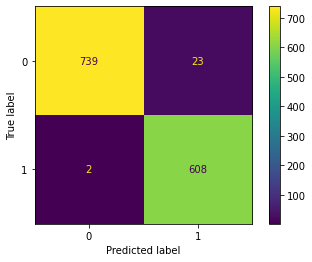

In [58]:
plot_confusion_matrix(log,scaled_X,y)

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [51]:
svm1= SVC(kernel='linear',C=5)

In [52]:
svm1.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [53]:
preds = svm1.predict(X_test)

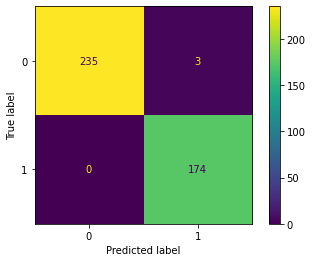

In [54]:
plot_confusion_matrix(svm1,X_test,y_test)

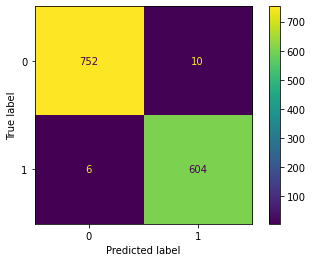

In [55]:
plot_confusion_matrix(svm1,X,y)

In [60]:
svm2= SVC(kernel='rbf',C=5)

In [61]:
svm2.fit(X_train, y_train)

SVC(C=5)

In [64]:
preds = svm1.predict(X_test)

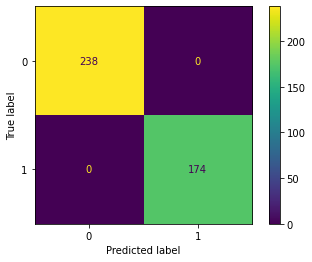

In [65]:
plot_confusion_matrix(svm2,X_test,y_test)

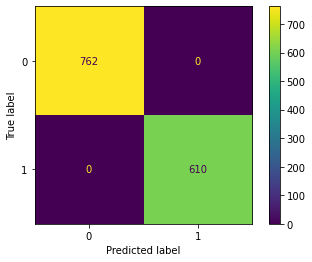

In [66]:
plot_confusion_matrix(svm2,X,y)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
n_estimators=[64,100,128,200]
max_features=[2,3,4]
bootstrap=[True,False]
oob_score=[True,False]

In [69]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'bootstrap':bootstrap,
           'oob_score':oob_score}

In [71]:
rfc= RandomForestClassifier()

In [72]:
grid=GridSearchCV(rfc,param_grid)

In [73]:
grid.fit(X_train,y_train)

C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\ana

C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\ana

C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\ana

C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Naruto\ana

C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.99479167 0.99479167 0.99375    0.99583333 0.99479167 0.99375
 0.99479167 0.99375    0.99479167 0.99583333 0.99479167 0.99583333
 0.99583333 0.99583333 0.99375    0.99479167 0.98854167 0.9875
 0.98958333 0.98854167 0.9875     0.98854167 0.98958333 0.98854167
        nan 0.99583333        nan 0.99479167        nan 0.99479167
        nan 0.99583333        nan 0.98854167        nan 0.98854167
        nan 0.98958333        nan 0.98958333        nan 0.97604167
        nan 0.97708333        nan 0.97708333        nan 0.97604167]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [74]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [78]:
rfc= RandomForestClassifier(max_features=2, n_estimators=100, oob_score=True)

In [79]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [80]:
rfc.oob_score_

0.9947916666666666

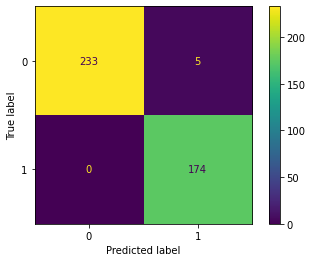

In [81]:
plot_confusion_matrix(rfc,X_test,y_test)

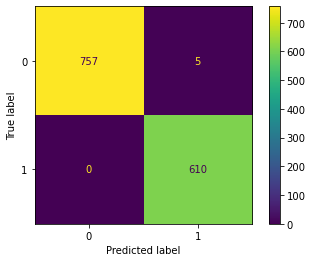

In [82]:
plot_confusion_matrix(rfc,X,y)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
param_grid = {'leaf_size' : [2,5,7,9,11],
               'n_neighbors' : [2,5,7,9,11],
                'p' : [1,2]}

In [85]:
grid1 = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid1.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [86]:
grid1.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [87]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2 )

In [88]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

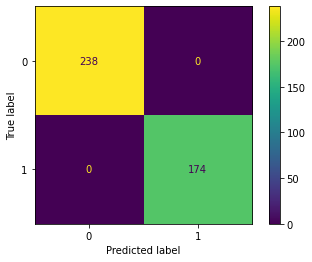

In [89]:
plot_confusion_matrix(KNN,X_test,y_test)

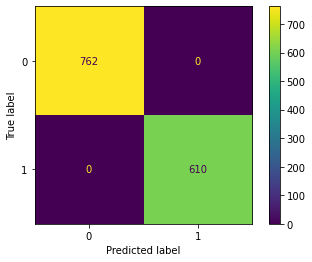

In [90]:
plot_confusion_matrix(KNN,X,y)

In [91]:
from sklearn.neural_network import MLPClassifier

In [92]:
multi_classifier=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
multi_classifier.fit(X_train,y_train)
multi_accuracies=cross_val_score(estimator=multi_classifier,X=X_test,y=y_test,cv=10)

Iteration 1, loss = 2.14405844
Iteration 2, loss = 1.94490093
Iteration 3, loss = 1.68364394
Iteration 4, loss = 1.44216378
Iteration 5, loss = 1.24176850
Iteration 6, loss = 1.08082755
Iteration 7, loss = 0.95864629
Iteration 8, loss = 0.86433706
Iteration 9, loss = 0.79251225
Iteration 10, loss = 0.73580093
Iteration 11, loss = 0.69012601
Iteration 12, loss = 0.65120997
Iteration 13, loss = 0.61687781
Iteration 14, loss = 0.58660236
Iteration 15, loss = 0.55963068
Iteration 16, loss = 0.53450691
Iteration 17, loss = 0.51086218
Iteration 18, loss = 0.48920520
Iteration 19, loss = 0.46820539
Iteration 20, loss = 0.44852645
Iteration 21, loss = 0.43050945
Iteration 22, loss = 0.41278066
Iteration 23, loss = 0.39619532
Iteration 24, loss = 0.38043934
Iteration 25, loss = 0.36471784
Iteration 26, loss = 0.35028309
Iteration 27, loss = 0.33613235
Iteration 28, loss = 0.32283574
Iteration 29, loss = 0.31023077
Iteration 30, loss = 0.29808906
Iteration 31, loss = 0.28685485
Iteration 32, los

Iteration 269, loss = 0.02043554
Iteration 270, loss = 0.02033712
Iteration 271, loss = 0.02024244
Iteration 272, loss = 0.02014549
Iteration 273, loss = 0.02005494
Iteration 274, loss = 0.01996198
Iteration 275, loss = 0.01986487
Iteration 276, loss = 0.01976826
Iteration 277, loss = 0.01968031
Iteration 278, loss = 0.01959053
Iteration 279, loss = 0.01949793
Iteration 280, loss = 0.01940493
Iteration 281, loss = 0.01932163
Iteration 282, loss = 0.01923434
Iteration 283, loss = 0.01914398
Iteration 284, loss = 0.01905435
Iteration 285, loss = 0.01897266
Iteration 286, loss = 0.01888812
Iteration 287, loss = 0.01880128
Iteration 288, loss = 0.01871847
Iteration 289, loss = 0.01863068
Iteration 290, loss = 0.01855009
Iteration 291, loss = 0.01846563
Iteration 292, loss = 0.01838930
Iteration 293, loss = 0.01830839
Iteration 294, loss = 0.01822987
Iteration 295, loss = 0.01814608
Iteration 296, loss = 0.01806775
Iteration 297, loss = 0.01798869
Iteration 298, loss = 0.01791533
Iteration 

Iteration 535, loss = 0.00861204
Iteration 536, loss = 0.00859329
Iteration 537, loss = 0.00857291
Iteration 538, loss = 0.00855216
Iteration 539, loss = 0.00853253
Iteration 540, loss = 0.00851373
Iteration 541, loss = 0.00849410
Iteration 542, loss = 0.00847428
Iteration 543, loss = 0.00845562
Iteration 544, loss = 0.00843653
Iteration 545, loss = 0.00841728
Iteration 546, loss = 0.00839793
Iteration 547, loss = 0.00838006
Iteration 548, loss = 0.00836094
Iteration 549, loss = 0.00834097
Iteration 550, loss = 0.00832337
Iteration 551, loss = 0.00830405
Iteration 552, loss = 0.00828595
Iteration 553, loss = 0.00826801
Iteration 554, loss = 0.00824847
Iteration 555, loss = 0.00822972
Iteration 556, loss = 0.00821243
Iteration 557, loss = 0.00819476
Iteration 558, loss = 0.00817766
Iteration 559, loss = 0.00815933
Iteration 560, loss = 0.00814005
Iteration 561, loss = 0.00812465
Iteration 562, loss = 0.00810478
Iteration 563, loss = 0.00808810
Iteration 564, loss = 0.00806919
Iteration 

Iteration 790, loss = 0.00535723
Iteration 791, loss = 0.00534847
Iteration 792, loss = 0.00534039
Iteration 793, loss = 0.00533300
Iteration 794, loss = 0.00532418
Iteration 795, loss = 0.00531634
Iteration 796, loss = 0.00530917
Iteration 797, loss = 0.00529985
Iteration 798, loss = 0.00529168
Iteration 799, loss = 0.00528417
Iteration 800, loss = 0.00527619
Iteration 801, loss = 0.00526834
Iteration 802, loss = 0.00525960
Iteration 803, loss = 0.00525151
Iteration 804, loss = 0.00524431
Iteration 805, loss = 0.00523709
Iteration 806, loss = 0.00522865
Iteration 807, loss = 0.00522063
Iteration 808, loss = 0.00521365
Iteration 809, loss = 0.00520478
Iteration 810, loss = 0.00519719
Iteration 811, loss = 0.00518976
Iteration 812, loss = 0.00518165
Iteration 813, loss = 0.00517387
Iteration 814, loss = 0.00516570
Iteration 815, loss = 0.00515875
Iteration 816, loss = 0.00515187
Iteration 817, loss = 0.00514322
Iteration 818, loss = 0.00513555
Iteration 819, loss = 0.00512865
Iteration 

Iteration 1040, loss = 0.00382802
Iteration 1041, loss = 0.00382363
Iteration 1042, loss = 0.00381908
Iteration 1043, loss = 0.00381431
Iteration 1044, loss = 0.00381039
Iteration 1045, loss = 0.00380541
Iteration 1046, loss = 0.00380111
Iteration 1047, loss = 0.00379671
Iteration 1048, loss = 0.00379235
Iteration 1049, loss = 0.00378786
Iteration 1050, loss = 0.00378302
Iteration 1051, loss = 0.00377897
Iteration 1052, loss = 0.00377417
Iteration 1053, loss = 0.00376980
Iteration 1054, loss = 0.00376602
Iteration 1055, loss = 0.00376167
Iteration 1056, loss = 0.00375651
Iteration 1057, loss = 0.00375254
Iteration 1058, loss = 0.00374881
Iteration 1059, loss = 0.00374392
Iteration 1060, loss = 0.00373918
Iteration 1061, loss = 0.00373485
Iteration 1062, loss = 0.00373130
Iteration 1063, loss = 0.00372640
Iteration 1064, loss = 0.00372183
Iteration 1065, loss = 0.00371737
Iteration 1066, loss = 0.00371347
Iteration 1067, loss = 0.00370927
Iteration 1068, loss = 0.00370478
Iteration 1069

Iteration 1299, loss = 0.00290669
Iteration 1300, loss = 0.00290393
Iteration 1301, loss = 0.00290078
Iteration 1302, loss = 0.00289836
Iteration 1303, loss = 0.00289544
Iteration 1304, loss = 0.00289269
Iteration 1305, loss = 0.00288984
Iteration 1306, loss = 0.00288736
Iteration 1307, loss = 0.00288476
Iteration 1308, loss = 0.00288204
Iteration 1309, loss = 0.00287893
Iteration 1310, loss = 0.00287618
Iteration 1311, loss = 0.00287346
Iteration 1312, loss = 0.00287074
Iteration 1313, loss = 0.00286792
Iteration 1314, loss = 0.00286544
Iteration 1315, loss = 0.00286256
Iteration 1316, loss = 0.00285972
Iteration 1317, loss = 0.00285715
Iteration 1318, loss = 0.00285445
Iteration 1319, loss = 0.00285215
Iteration 1320, loss = 0.00284902
Iteration 1321, loss = 0.00284618
Iteration 1322, loss = 0.00284367
Iteration 1323, loss = 0.00284102
Iteration 1324, loss = 0.00283818
Iteration 1325, loss = 0.00283592
Iteration 1326, loss = 0.00283313
Iteration 1327, loss = 0.00283040
Iteration 1328

Iteration 1547, loss = 0.00233524
Iteration 1548, loss = 0.00233376
Iteration 1549, loss = 0.00233139
Iteration 1550, loss = 0.00232973
Iteration 1551, loss = 0.00232794
Iteration 1552, loss = 0.00232574
Iteration 1553, loss = 0.00232402
Iteration 1554, loss = 0.00232194
Iteration 1555, loss = 0.00232028
Iteration 1556, loss = 0.00231845
Iteration 1557, loss = 0.00231658
Iteration 1558, loss = 0.00231464
Iteration 1559, loss = 0.00231264
Iteration 1560, loss = 0.00231102
Iteration 1561, loss = 0.00230895
Iteration 1562, loss = 0.00230698
Iteration 1563, loss = 0.00230594
Iteration 1564, loss = 0.00230331
Iteration 1565, loss = 0.00230167
Iteration 1566, loss = 0.00229978
Iteration 1567, loss = 0.00229807
Iteration 1568, loss = 0.00229629
Iteration 1569, loss = 0.00229422
Iteration 1570, loss = 0.00229251
Iteration 1571, loss = 0.00229067
Iteration 1572, loss = 0.00228876
Iteration 1573, loss = 0.00228682
Iteration 1574, loss = 0.00228515
Iteration 1575, loss = 0.00228368
Iteration 1576

Iteration 1797, loss = 0.00193285
Iteration 1798, loss = 0.00193174
Iteration 1799, loss = 0.00193022
Iteration 1800, loss = 0.00192888
Iteration 1801, loss = 0.00192750
Iteration 1802, loss = 0.00192604
Iteration 1803, loss = 0.00192464
Iteration 1804, loss = 0.00192315
Iteration 1805, loss = 0.00192198
Iteration 1806, loss = 0.00192065
Iteration 1807, loss = 0.00191920
Iteration 1808, loss = 0.00191793
Iteration 1809, loss = 0.00191655
Iteration 1810, loss = 0.00191530
Iteration 1811, loss = 0.00191387
Iteration 1812, loss = 0.00191246
Iteration 1813, loss = 0.00191116
Iteration 1814, loss = 0.00191006
Iteration 1815, loss = 0.00190858
Iteration 1816, loss = 0.00190715
Iteration 1817, loss = 0.00190571
Iteration 1818, loss = 0.00190479
Iteration 1819, loss = 0.00190322
Iteration 1820, loss = 0.00190197
Iteration 1821, loss = 0.00190041
Iteration 1822, loss = 0.00189912
Iteration 1823, loss = 0.00189777
Iteration 1824, loss = 0.00189674
Iteration 1825, loss = 0.00189515
Iteration 1826

Iteration 2045, loss = 0.00163964
Iteration 2046, loss = 0.00163865
Iteration 2047, loss = 0.00163753
Iteration 2048, loss = 0.00163663
Iteration 2049, loss = 0.00163555
Iteration 2050, loss = 0.00163461
Iteration 2051, loss = 0.00163346
Iteration 2052, loss = 0.00163254
Iteration 2053, loss = 0.00163156
Iteration 2054, loss = 0.00163062
Iteration 2055, loss = 0.00162946
Iteration 2056, loss = 0.00162874
Iteration 2057, loss = 0.00162732
Iteration 2058, loss = 0.00162640
Iteration 2059, loss = 0.00162538
Iteration 2060, loss = 0.00162441
Iteration 2061, loss = 0.00162336
Iteration 2062, loss = 0.00162240
Iteration 2063, loss = 0.00162140
Iteration 2064, loss = 0.00162032
Iteration 2065, loss = 0.00161932
Iteration 2066, loss = 0.00161846
Iteration 2067, loss = 0.00161744
Iteration 2068, loss = 0.00161635
Iteration 2069, loss = 0.00161533
Iteration 2070, loss = 0.00161463
Iteration 2071, loss = 0.00161338
Iteration 2072, loss = 0.00161238
Iteration 2073, loss = 0.00161135
Iteration 2074

Iteration 2291, loss = 0.00141770
Iteration 2292, loss = 0.00141685
Iteration 2293, loss = 0.00141598
Iteration 2294, loss = 0.00141529
Iteration 2295, loss = 0.00141459
Iteration 2296, loss = 0.00141371
Iteration 2297, loss = 0.00141287
Iteration 2298, loss = 0.00141211
Iteration 2299, loss = 0.00141140
Iteration 2300, loss = 0.00141061
Iteration 2301, loss = 0.00140977
Iteration 2302, loss = 0.00140903
Iteration 2303, loss = 0.00140828
Iteration 2304, loss = 0.00140748
Iteration 2305, loss = 0.00140675
Iteration 2306, loss = 0.00140592
Iteration 2307, loss = 0.00140516
Iteration 2308, loss = 0.00140434
Iteration 2309, loss = 0.00140370
Iteration 2310, loss = 0.00140281
Iteration 2311, loss = 0.00140203
Iteration 2312, loss = 0.00140121
Iteration 2313, loss = 0.00140043
Iteration 2314, loss = 0.00139968
Iteration 2315, loss = 0.00139892
Iteration 2316, loss = 0.00139819
Iteration 2317, loss = 0.00139734
Iteration 2318, loss = 0.00139661
Iteration 2319, loss = 0.00139576
Iteration 2320

Iteration 2535, loss = 0.00124584
Iteration 2536, loss = 0.00124528
Iteration 2537, loss = 0.00124454
Iteration 2538, loss = 0.00124395
Iteration 2539, loss = 0.00124331
Iteration 2540, loss = 0.00124276
Iteration 2541, loss = 0.00124203
Iteration 2542, loss = 0.00124157
Iteration 2543, loss = 0.00124075
Iteration 2544, loss = 0.00124030
Iteration 2545, loss = 0.00123954
Iteration 2546, loss = 0.00123889
Iteration 2547, loss = 0.00123827
Iteration 2548, loss = 0.00123768
Iteration 2549, loss = 0.00123699
Iteration 2550, loss = 0.00123639
Iteration 2551, loss = 0.00123579
Iteration 2552, loss = 0.00123528
Iteration 2553, loss = 0.00123459
Iteration 2554, loss = 0.00123399
Iteration 2555, loss = 0.00123347
Iteration 2556, loss = 0.00123280
Iteration 2557, loss = 0.00123209
Iteration 2558, loss = 0.00123149
Iteration 2559, loss = 0.00123093
Iteration 2560, loss = 0.00123025
Iteration 2561, loss = 0.00122977
Iteration 2562, loss = 0.00122907
Iteration 2563, loss = 0.00122849
Iteration 2564

Iteration 2779, loss = 0.00110814
Iteration 2780, loss = 0.00110755
Iteration 2781, loss = 0.00110695
Iteration 2782, loss = 0.00110650
Iteration 2783, loss = 0.00110597
Iteration 2784, loss = 0.00110545
Iteration 2785, loss = 0.00110499
Iteration 2786, loss = 0.00110447
Iteration 2787, loss = 0.00110392
Iteration 2788, loss = 0.00110349
Iteration 2789, loss = 0.00110295
Iteration 2790, loss = 0.00110241
Iteration 2791, loss = 0.00110196
Iteration 2792, loss = 0.00110141
Iteration 2793, loss = 0.00110108
Iteration 2794, loss = 0.00110049
Iteration 2795, loss = 0.00109997
Iteration 2796, loss = 0.00109939
Iteration 2797, loss = 0.00109891
Iteration 2798, loss = 0.00109846
Iteration 2799, loss = 0.00109791
Iteration 2800, loss = 0.00109741
Iteration 2801, loss = 0.00109686
Iteration 2802, loss = 0.00109640
Iteration 2803, loss = 0.00109589
Iteration 2804, loss = 0.00109550
Iteration 2805, loss = 0.00109488
Iteration 2806, loss = 0.00109444
Iteration 2807, loss = 0.00109392
Iteration 2808

Iteration 3023, loss = 0.00099510
Iteration 3024, loss = 0.00099469
Iteration 3025, loss = 0.00099428
Iteration 3026, loss = 0.00099385
Iteration 3027, loss = 0.00099345
Iteration 3028, loss = 0.00099309
Iteration 3029, loss = 0.00099259
Iteration 3030, loss = 0.00099219
Iteration 3031, loss = 0.00099172
Iteration 3032, loss = 0.00099141
Iteration 3033, loss = 0.00099094
Iteration 3034, loss = 0.00099056
Iteration 3035, loss = 0.00099008
Iteration 3036, loss = 0.00098965
Iteration 3037, loss = 0.00098924
Iteration 3038, loss = 0.00098885
Iteration 3039, loss = 0.00098842
Iteration 3040, loss = 0.00098798
Iteration 3041, loss = 0.00098754
Iteration 3042, loss = 0.00098723
Iteration 3043, loss = 0.00098675
Iteration 3044, loss = 0.00098632
Iteration 3045, loss = 0.00098600
Iteration 3046, loss = 0.00098547
Iteration 3047, loss = 0.00098506
Iteration 3048, loss = 0.00098463
Iteration 3049, loss = 0.00098436
Iteration 3050, loss = 0.00098387
Iteration 3051, loss = 0.00098342
Iteration 3052

Iteration 3273, loss = 0.00089902
Iteration 3274, loss = 0.00089867
Iteration 3275, loss = 0.00089833
Iteration 3276, loss = 0.00089800
Iteration 3277, loss = 0.00089765
Iteration 3278, loss = 0.00089728
Iteration 3279, loss = 0.00089699
Iteration 3280, loss = 0.00089659
Iteration 3281, loss = 0.00089626
Iteration 3282, loss = 0.00089595
Iteration 3283, loss = 0.00089552
Iteration 3284, loss = 0.00089519
Iteration 3285, loss = 0.00089484
Iteration 3286, loss = 0.00089455
Iteration 3287, loss = 0.00089415
Iteration 3288, loss = 0.00089380
Iteration 3289, loss = 0.00089352
Iteration 3290, loss = 0.00089311
Iteration 3291, loss = 0.00089275
Iteration 3292, loss = 0.00089240
Iteration 3293, loss = 0.00089213
Iteration 3294, loss = 0.00089172
Iteration 3295, loss = 0.00089140
Iteration 3296, loss = 0.00089105
Iteration 3297, loss = 0.00089078
Iteration 3298, loss = 0.00089033
Iteration 3299, loss = 0.00089006
Iteration 3300, loss = 0.00088971
Iteration 3301, loss = 0.00088932
Iteration 3302

Iteration 3532, loss = 0.00081593
Iteration 3533, loss = 0.00081572
Iteration 3534, loss = 0.00081538
Iteration 3535, loss = 0.00081508
Iteration 3536, loss = 0.00081479
Iteration 3537, loss = 0.00081449
Iteration 3538, loss = 0.00081422
Iteration 3539, loss = 0.00081393
Iteration 3540, loss = 0.00081363
Iteration 3541, loss = 0.00081334
Iteration 3542, loss = 0.00081304
Iteration 3543, loss = 0.00081276
Iteration 3544, loss = 0.00081245
Iteration 3545, loss = 0.00081214
Iteration 3546, loss = 0.00081188
Iteration 3547, loss = 0.00081162
Iteration 3548, loss = 0.00081127
Iteration 3549, loss = 0.00081102
Iteration 3550, loss = 0.00081073
Iteration 3551, loss = 0.00081047
Iteration 3552, loss = 0.00081011
Iteration 3553, loss = 0.00080986
Iteration 3554, loss = 0.00080958
Iteration 3555, loss = 0.00080931
Iteration 3556, loss = 0.00080905
Iteration 3557, loss = 0.00080867
Iteration 3558, loss = 0.00080839
Iteration 3559, loss = 0.00080808
Iteration 3560, loss = 0.00080781
Iteration 3561

Iteration 3787, loss = 0.00074665
Iteration 3788, loss = 0.00074644
Iteration 3789, loss = 0.00074617
Iteration 3790, loss = 0.00074593
Iteration 3791, loss = 0.00074566
Iteration 3792, loss = 0.00074550
Iteration 3793, loss = 0.00074518
Iteration 3794, loss = 0.00074496
Iteration 3795, loss = 0.00074465
Iteration 3796, loss = 0.00074444
Iteration 3797, loss = 0.00074418
Iteration 3798, loss = 0.00074393
Iteration 3799, loss = 0.00074366
Iteration 3800, loss = 0.00074345
Iteration 3801, loss = 0.00074319
Iteration 3802, loss = 0.00074288
Iteration 3803, loss = 0.00074271
Iteration 3804, loss = 0.00074244
Iteration 3805, loss = 0.00074215
Iteration 3806, loss = 0.00074191
Iteration 3807, loss = 0.00074167
Iteration 3808, loss = 0.00074139
Iteration 3809, loss = 0.00074116
Iteration 3810, loss = 0.00074095
Iteration 3811, loss = 0.00074068
Iteration 3812, loss = 0.00074046
Iteration 3813, loss = 0.00074019
Iteration 3814, loss = 0.00074000
Iteration 3815, loss = 0.00073968
Iteration 3816

Iteration 4040, loss = 0.00068763
Iteration 4041, loss = 0.00068737
Iteration 4042, loss = 0.00068716
Iteration 4043, loss = 0.00068699
Iteration 4044, loss = 0.00068673
Iteration 4045, loss = 0.00068653
Iteration 4046, loss = 0.00068631
Iteration 4047, loss = 0.00068616
Iteration 4048, loss = 0.00068594
Iteration 4049, loss = 0.00068570
Iteration 4050, loss = 0.00068544
Iteration 4051, loss = 0.00068525
Iteration 4052, loss = 0.00068500
Iteration 4053, loss = 0.00068481
Iteration 4054, loss = 0.00068458
Iteration 4055, loss = 0.00068438
Iteration 4056, loss = 0.00068418
Iteration 4057, loss = 0.00068392
Iteration 4058, loss = 0.00068374
Iteration 4059, loss = 0.00068353
Iteration 4060, loss = 0.00068327
Iteration 4061, loss = 0.00068308
Iteration 4062, loss = 0.00068288
Iteration 4063, loss = 0.00068264
Iteration 4064, loss = 0.00068241
Iteration 4065, loss = 0.00068223
Iteration 4066, loss = 0.00068200
Iteration 4067, loss = 0.00068178
Iteration 4068, loss = 0.00068157
Iteration 4069

Iteration 4302, loss = 0.00063589
Iteration 4303, loss = 0.00063571
Iteration 4304, loss = 0.00063549
Iteration 4305, loss = 0.00063531
Iteration 4306, loss = 0.00063514
Iteration 4307, loss = 0.00063496
Iteration 4308, loss = 0.00063479
Iteration 4309, loss = 0.00063457
Iteration 4310, loss = 0.00063442
Iteration 4311, loss = 0.00063426
Iteration 4312, loss = 0.00063406
Iteration 4313, loss = 0.00063386
Iteration 4314, loss = 0.00063369
Iteration 4315, loss = 0.00063353
Iteration 4316, loss = 0.00063333
Iteration 4317, loss = 0.00063314
Iteration 4318, loss = 0.00063297
Iteration 4319, loss = 0.00063280
Iteration 4320, loss = 0.00063259
Iteration 4321, loss = 0.00063245
Iteration 4322, loss = 0.00063224
Iteration 4323, loss = 0.00063206
Iteration 4324, loss = 0.00063188
Iteration 4325, loss = 0.00063170
Iteration 4326, loss = 0.00063151
Iteration 4327, loss = 0.00063133
Iteration 4328, loss = 0.00063118
Iteration 4329, loss = 0.00063099
Iteration 4330, loss = 0.00063079
Iteration 4331

Iteration 4547, loss = 0.00059393
Iteration 4548, loss = 0.00059378
Iteration 4549, loss = 0.00059358
Iteration 4550, loss = 0.00059344
Iteration 4551, loss = 0.00059327
Iteration 4552, loss = 0.00059311
Iteration 4553, loss = 0.00059298
Iteration 4554, loss = 0.00059278
Iteration 4555, loss = 0.00059266
Iteration 4556, loss = 0.00059249
Iteration 4557, loss = 0.00059233
Iteration 4558, loss = 0.00059215
Iteration 4559, loss = 0.00059200
Iteration 4560, loss = 0.00059184
Iteration 4561, loss = 0.00059168
Iteration 4562, loss = 0.00059151
Iteration 4563, loss = 0.00059134
Iteration 4564, loss = 0.00059119
Iteration 4565, loss = 0.00059103
Iteration 4566, loss = 0.00059088
Iteration 4567, loss = 0.00059075
Iteration 4568, loss = 0.00059057
Iteration 4569, loss = 0.00059040
Iteration 4570, loss = 0.00059023
Iteration 4571, loss = 0.00059008
Iteration 4572, loss = 0.00058991
Iteration 4573, loss = 0.00058975
Iteration 4574, loss = 0.00058961
Iteration 4575, loss = 0.00058944
Iteration 4576

Iteration 4840, loss = 0.00054995
Iteration 4841, loss = 0.00054980
Iteration 4842, loss = 0.00054966
Iteration 4843, loss = 0.00054953
Iteration 4844, loss = 0.00054941
Iteration 4845, loss = 0.00054925
Iteration 4846, loss = 0.00054911
Iteration 4847, loss = 0.00054896
Iteration 4848, loss = 0.00054882
Iteration 4849, loss = 0.00054871
Iteration 4850, loss = 0.00054856
Iteration 4851, loss = 0.00054842
Iteration 4852, loss = 0.00054830
Iteration 4853, loss = 0.00054818
Iteration 4854, loss = 0.00054799
Iteration 4855, loss = 0.00054784
Iteration 4856, loss = 0.00054772
Iteration 4857, loss = 0.00054757
Iteration 4858, loss = 0.00054745
Iteration 4859, loss = 0.00054729
Iteration 4860, loss = 0.00054717
Iteration 4861, loss = 0.00054702
Iteration 4862, loss = 0.00054688
Iteration 4863, loss = 0.00054673
Iteration 4864, loss = 0.00054659
Iteration 4865, loss = 0.00054646
Iteration 4866, loss = 0.00054633
Iteration 4867, loss = 0.00054617
Iteration 4868, loss = 0.00054604
Iteration 4869

Iteration 5112, loss = 0.00051408
Iteration 5113, loss = 0.00051399
Iteration 5114, loss = 0.00051386
Iteration 5115, loss = 0.00051371
Iteration 5116, loss = 0.00051361
Iteration 5117, loss = 0.00051350
Iteration 5118, loss = 0.00051335
Iteration 5119, loss = 0.00051323
Iteration 5120, loss = 0.00051310
Iteration 5121, loss = 0.00051298
Iteration 5122, loss = 0.00051286
Iteration 5123, loss = 0.00051273
Iteration 5124, loss = 0.00051262
Iteration 5125, loss = 0.00051247
Iteration 5126, loss = 0.00051237
Iteration 5127, loss = 0.00051223
Iteration 5128, loss = 0.00051211
Iteration 5129, loss = 0.00051198
Iteration 5130, loss = 0.00051186
Iteration 5131, loss = 0.00051174
Iteration 5132, loss = 0.00051163
Iteration 5133, loss = 0.00051151
Iteration 5134, loss = 0.00051141
Iteration 5135, loss = 0.00051127
Iteration 5136, loss = 0.00051112
Iteration 5137, loss = 0.00051101
Iteration 5138, loss = 0.00051089
Iteration 5139, loss = 0.00051079
Iteration 5140, loss = 0.00051064
Iteration 5141

Iteration 5364, loss = 0.00048448
Iteration 5365, loss = 0.00048439
Iteration 5366, loss = 0.00048427
Iteration 5367, loss = 0.00048414
Iteration 5368, loss = 0.00048406
Iteration 5369, loss = 0.00048392
Iteration 5370, loss = 0.00048384
Iteration 5371, loss = 0.00048371
Iteration 5372, loss = 0.00048363
Iteration 5373, loss = 0.00048349
Iteration 5374, loss = 0.00048337
Iteration 5375, loss = 0.00048327
Iteration 5376, loss = 0.00048316
Iteration 5377, loss = 0.00048304
Iteration 5378, loss = 0.00048293
Iteration 5379, loss = 0.00048283
Iteration 5380, loss = 0.00048270
Iteration 5381, loss = 0.00048260
Iteration 5382, loss = 0.00048249
Iteration 5383, loss = 0.00048237
Iteration 5384, loss = 0.00048226
Iteration 5385, loss = 0.00048215
Iteration 5386, loss = 0.00048203
Iteration 5387, loss = 0.00048195
Iteration 5388, loss = 0.00048181
Iteration 5389, loss = 0.00048172
Iteration 5390, loss = 0.00048160
Iteration 5391, loss = 0.00048150
Iteration 5392, loss = 0.00048139
Iteration 5393

Iteration 5616, loss = 0.00045784
Iteration 5617, loss = 0.00045774
Iteration 5618, loss = 0.00045763
Iteration 5619, loss = 0.00045752
Iteration 5620, loss = 0.00045744
Iteration 5621, loss = 0.00045732
Iteration 5622, loss = 0.00045721
Iteration 5623, loss = 0.00045713
Iteration 5624, loss = 0.00045702
Iteration 5625, loss = 0.00045693
Iteration 5626, loss = 0.00045682
Iteration 5627, loss = 0.00045672
Iteration 5628, loss = 0.00045663
Iteration 5629, loss = 0.00045652
Iteration 5630, loss = 0.00045643
Iteration 5631, loss = 0.00045632
Iteration 5632, loss = 0.00045625
Iteration 5633, loss = 0.00045613
Iteration 5634, loss = 0.00045603
Iteration 5635, loss = 0.00045593
Iteration 5636, loss = 0.00045581
Iteration 5637, loss = 0.00045573
Iteration 5638, loss = 0.00045562
Iteration 5639, loss = 0.00045554
Iteration 5640, loss = 0.00045543
Iteration 5641, loss = 0.00045536
Iteration 5642, loss = 0.00045523
Iteration 5643, loss = 0.00045513
Iteration 5644, loss = 0.00045504
Iteration 5645

Iteration 5871, loss = 0.00043346
Iteration 5872, loss = 0.00043337
Iteration 5873, loss = 0.00043327
Iteration 5874, loss = 0.00043319
Iteration 5875, loss = 0.00043309
Iteration 5876, loss = 0.00043300
Iteration 5877, loss = 0.00043292
Iteration 5878, loss = 0.00043281
Iteration 5879, loss = 0.00043275
Iteration 5880, loss = 0.00043266
Iteration 5881, loss = 0.00043253
Iteration 5882, loss = 0.00043246
Iteration 5883, loss = 0.00043239
Iteration 5884, loss = 0.00043227
Iteration 5885, loss = 0.00043217
Iteration 5886, loss = 0.00043210
Iteration 5887, loss = 0.00043200
Iteration 5888, loss = 0.00043191
Iteration 5889, loss = 0.00043183
Iteration 5890, loss = 0.00043172
Iteration 5891, loss = 0.00043163
Iteration 5892, loss = 0.00043155
Iteration 5893, loss = 0.00043144
Iteration 5894, loss = 0.00043136
Iteration 5895, loss = 0.00043127
Iteration 5896, loss = 0.00043120
Iteration 5897, loss = 0.00043111
Iteration 5898, loss = 0.00043099
Iteration 5899, loss = 0.00043093
Iteration 5900

Iteration 6116, loss = 0.00041215
Iteration 6117, loss = 0.00041206
Iteration 6118, loss = 0.00041198
Iteration 6119, loss = 0.00041190
Iteration 6120, loss = 0.00041181
Iteration 6121, loss = 0.00041172
Iteration 6122, loss = 0.00041165
Iteration 6123, loss = 0.00041157
Iteration 6124, loss = 0.00041147
Iteration 6125, loss = 0.00041139
Iteration 6126, loss = 0.00041132
Iteration 6127, loss = 0.00041122
Iteration 6128, loss = 0.00041116
Iteration 6129, loss = 0.00041106
Iteration 6130, loss = 0.00041098
Iteration 6131, loss = 0.00041090
Iteration 6132, loss = 0.00041083
Iteration 6133, loss = 0.00041073
Iteration 6134, loss = 0.00041064
Iteration 6135, loss = 0.00041057
Iteration 6136, loss = 0.00041047
Iteration 6137, loss = 0.00041040
Iteration 6138, loss = 0.00041031
Iteration 6139, loss = 0.00041023
Iteration 6140, loss = 0.00041014
Iteration 6141, loss = 0.00041007
Iteration 6142, loss = 0.00040999
Iteration 6143, loss = 0.00040990
Iteration 6144, loss = 0.00040983
Iteration 6145

Iteration 6358, loss = 0.00039293
Iteration 6359, loss = 0.00039284
Iteration 6360, loss = 0.00039277
Iteration 6361, loss = 0.00039270
Iteration 6362, loss = 0.00039262
Iteration 6363, loss = 0.00039253
Iteration 6364, loss = 0.00039247
Iteration 6365, loss = 0.00039240
Iteration 6366, loss = 0.00039232
Iteration 6367, loss = 0.00039224
Iteration 6368, loss = 0.00039217
Iteration 6369, loss = 0.00039210
Iteration 6370, loss = 0.00039201
Iteration 6371, loss = 0.00039194
Iteration 6372, loss = 0.00039186
Iteration 6373, loss = 0.00039179
Iteration 6374, loss = 0.00039171
Iteration 6375, loss = 0.00039164
Iteration 6376, loss = 0.00039156
Iteration 6377, loss = 0.00039150
Iteration 6378, loss = 0.00039140
Iteration 6379, loss = 0.00039133
Iteration 6380, loss = 0.00039126
Iteration 6381, loss = 0.00039119
Iteration 6382, loss = 0.00039110
Iteration 6383, loss = 0.00039102
Iteration 6384, loss = 0.00039095
Iteration 6385, loss = 0.00039088
Iteration 6386, loss = 0.00039081
Iteration 6387

Iteration 6607, loss = 0.00037478
Iteration 6608, loss = 0.00037471
Iteration 6609, loss = 0.00037464
Iteration 6610, loss = 0.00037457
Iteration 6611, loss = 0.00037449
Iteration 6612, loss = 0.00037443
Iteration 6613, loss = 0.00037436
Iteration 6614, loss = 0.00037428
Iteration 6615, loss = 0.00037422
Iteration 6616, loss = 0.00037415
Iteration 6617, loss = 0.00037408
Iteration 6618, loss = 0.00037401
Iteration 6619, loss = 0.00037396
Iteration 6620, loss = 0.00037389
Iteration 6621, loss = 0.00037380
Iteration 6622, loss = 0.00037374
Iteration 6623, loss = 0.00037367
Iteration 6624, loss = 0.00037359
Iteration 6625, loss = 0.00037352
Iteration 6626, loss = 0.00037346
Iteration 6627, loss = 0.00037340
Iteration 6628, loss = 0.00037331
Iteration 6629, loss = 0.00037326
Iteration 6630, loss = 0.00037319
Iteration 6631, loss = 0.00037311
Iteration 6632, loss = 0.00037304
Iteration 6633, loss = 0.00037297
Iteration 6634, loss = 0.00037291
Iteration 6635, loss = 0.00037283
Iteration 6636

Iteration 6852, loss = 0.00035834
Iteration 6853, loss = 0.00035828
Iteration 6854, loss = 0.00035821
Iteration 6855, loss = 0.00035815
Iteration 6856, loss = 0.00035809
Iteration 6857, loss = 0.00035802
Iteration 6858, loss = 0.00035796
Iteration 6859, loss = 0.00035790
Iteration 6860, loss = 0.00035784
Iteration 6861, loss = 0.00035777
Iteration 6862, loss = 0.00035770
Iteration 6863, loss = 0.00035764
Iteration 6864, loss = 0.00035758
Iteration 6865, loss = 0.00035751
Iteration 6866, loss = 0.00035744
Iteration 6867, loss = 0.00035740
Iteration 6868, loss = 0.00035733
Iteration 6869, loss = 0.00035727
Iteration 6870, loss = 0.00035719
Iteration 6871, loss = 0.00035713
Iteration 6872, loss = 0.00035706
Iteration 6873, loss = 0.00035699
Iteration 6874, loss = 0.00035693
Iteration 6875, loss = 0.00035687
Iteration 6876, loss = 0.00035681
Iteration 6877, loss = 0.00035674
Iteration 6878, loss = 0.00035668
Iteration 6879, loss = 0.00035661
Iteration 6880, loss = 0.00035658
Iteration 6881

Iteration 7097, loss = 0.00034319
Iteration 7098, loss = 0.00034312
Iteration 7099, loss = 0.00034307
Iteration 7100, loss = 0.00034300
Iteration 7101, loss = 0.00034295
Iteration 7102, loss = 0.00034289
Iteration 7103, loss = 0.00034283
Iteration 7104, loss = 0.00034276
Iteration 7105, loss = 0.00034270
Iteration 7106, loss = 0.00034265
Iteration 7107, loss = 0.00034259
Iteration 7108, loss = 0.00034253
Iteration 7109, loss = 0.00034248
Iteration 7110, loss = 0.00034241
Iteration 7111, loss = 0.00034235
Iteration 7112, loss = 0.00034229
Iteration 7113, loss = 0.00034222
Iteration 7114, loss = 0.00034218
Iteration 7115, loss = 0.00034212
Iteration 7116, loss = 0.00034205
Iteration 7117, loss = 0.00034200
Iteration 7118, loss = 0.00034194
Iteration 7119, loss = 0.00034187
Iteration 7120, loss = 0.00034181
Iteration 7121, loss = 0.00034177
Iteration 7122, loss = 0.00034170
Iteration 7123, loss = 0.00034164
Iteration 7124, loss = 0.00034158
Iteration 7125, loss = 0.00034153
Iteration 7126

Iteration 7346, loss = 0.00032894
Iteration 7347, loss = 0.00032887
Iteration 7348, loss = 0.00032881
Iteration 7349, loss = 0.00032876
Iteration 7350, loss = 0.00032870
Iteration 7351, loss = 0.00032865
Iteration 7352, loss = 0.00032859
Iteration 7353, loss = 0.00032854
Iteration 7354, loss = 0.00032849
Iteration 7355, loss = 0.00032843
Iteration 7356, loss = 0.00032837
Iteration 7357, loss = 0.00032832
Iteration 7358, loss = 0.00032826
Iteration 7359, loss = 0.00032821
Iteration 7360, loss = 0.00032815
Iteration 7361, loss = 0.00032809
Iteration 7362, loss = 0.00032804
Iteration 7363, loss = 0.00032798
Iteration 7364, loss = 0.00032794
Iteration 7365, loss = 0.00032788
Iteration 7366, loss = 0.00032783
Iteration 7367, loss = 0.00032776
Iteration 7368, loss = 0.00032772
Iteration 7369, loss = 0.00032765
Iteration 7370, loss = 0.00032761
Iteration 7371, loss = 0.00032755
Iteration 7372, loss = 0.00032750
Iteration 7373, loss = 0.00032745
Iteration 7374, loss = 0.00032738
Iteration 7375

Iteration 7595, loss = 0.00031571
Iteration 7596, loss = 0.00031566
Iteration 7597, loss = 0.00031562
Iteration 7598, loss = 0.00031555
Iteration 7599, loss = 0.00031551
Iteration 7600, loss = 0.00031545
Iteration 7601, loss = 0.00031541
Iteration 7602, loss = 0.00031535
Iteration 7603, loss = 0.00031531
Iteration 7604, loss = 0.00031525
Iteration 7605, loss = 0.00031519
Iteration 7606, loss = 0.00031515
Iteration 7607, loss = 0.00031510
Iteration 7608, loss = 0.00031505
Iteration 7609, loss = 0.00031499
Iteration 7610, loss = 0.00031494
Iteration 7611, loss = 0.00031489
Iteration 7612, loss = 0.00031484
Iteration 7613, loss = 0.00031480
Iteration 7614, loss = 0.00031474
Iteration 7615, loss = 0.00031468
Iteration 7616, loss = 0.00031463
Iteration 7617, loss = 0.00031459
Iteration 7618, loss = 0.00031454
Iteration 7619, loss = 0.00031448
Iteration 7620, loss = 0.00031443
Iteration 7621, loss = 0.00031438
Iteration 7622, loss = 0.00031433
Iteration 7623, loss = 0.00031429
Iteration 7624

Iteration 7844, loss = 0.00030345
Iteration 7845, loss = 0.00030340
Iteration 7846, loss = 0.00030335
Iteration 7847, loss = 0.00030330
Iteration 7848, loss = 0.00030326
Iteration 7849, loss = 0.00030320
Iteration 7850, loss = 0.00030316
Iteration 7851, loss = 0.00030311
Iteration 7852, loss = 0.00030306
Iteration 7853, loss = 0.00030302
Iteration 7854, loss = 0.00030297
Iteration 7855, loss = 0.00030292
Iteration 7856, loss = 0.00030288
Iteration 7857, loss = 0.00030282
Iteration 7858, loss = 0.00030278
Iteration 7859, loss = 0.00030273
Iteration 7860, loss = 0.00030268
Iteration 7861, loss = 0.00030264
Iteration 7862, loss = 0.00030259
Iteration 7863, loss = 0.00030254
Iteration 7864, loss = 0.00030249
Iteration 7865, loss = 0.00030245
Iteration 7866, loss = 0.00030241
Iteration 7867, loss = 0.00030235
Iteration 7868, loss = 0.00030231
Iteration 7869, loss = 0.00030226
Iteration 7870, loss = 0.00030221
Iteration 7871, loss = 0.00030216
Iteration 7872, loss = 0.00030212
Iteration 7873

C:\Users\Naruto\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8000) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'cross_val_score' is not defined

In [93]:
multi_predicted = multi_classifier.predict(X_test)

In [94]:
accuracy_score(y_test,multi_predicted)

1.0

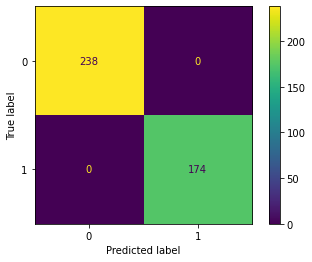

In [95]:
plot_confusion_matrix(multi_classifier,X_test,y_test)

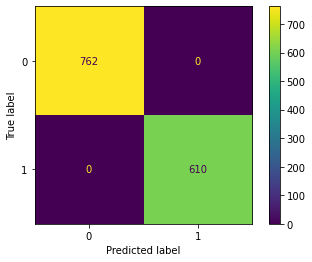

In [96]:
plot_confusion_matrix(multi_classifier,X,y)